In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
   - -------------------------------------- 0.5/15.5 MB 5.7 MB/s eta 0:00:03
   --- ------------------------------------ 1.3/15.5 MB 4.5 MB/s eta 0:00:04
   ------ --------------------------------- 2.4/15.5 MB 4.3 MB/s eta 0:00:04
   -------- ------------------------------- 3.4/15.5 MB 4.5 MB/s eta 0:00:03
   ---------- ----------------------------- 4.2/15.5 MB 4.3 MB/s eta 0:00:03
   ------------- -------------------------- 5.2/15.5 MB 4.5 MB/s eta 0:00:03
   ---------------- ----------------------- 6.3/15.5 MB 4.6 MB/s eta 0:00:03
   ------------------ --------------------- 7.3/15.5 MB 4.5 MB/s eta 0:00:02
   --------------------- ------------------ 8.4/15.5 MB 4.6 MB/s eta 0:00:02
   ------------------------- -------------- 9.7/15.5 MB 4.7 MB/s eta 0:00:02
   --------------------------- ------------ 10.5/15.5 MB 4.7 MB/s eta 0:00:02
   -

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [3]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

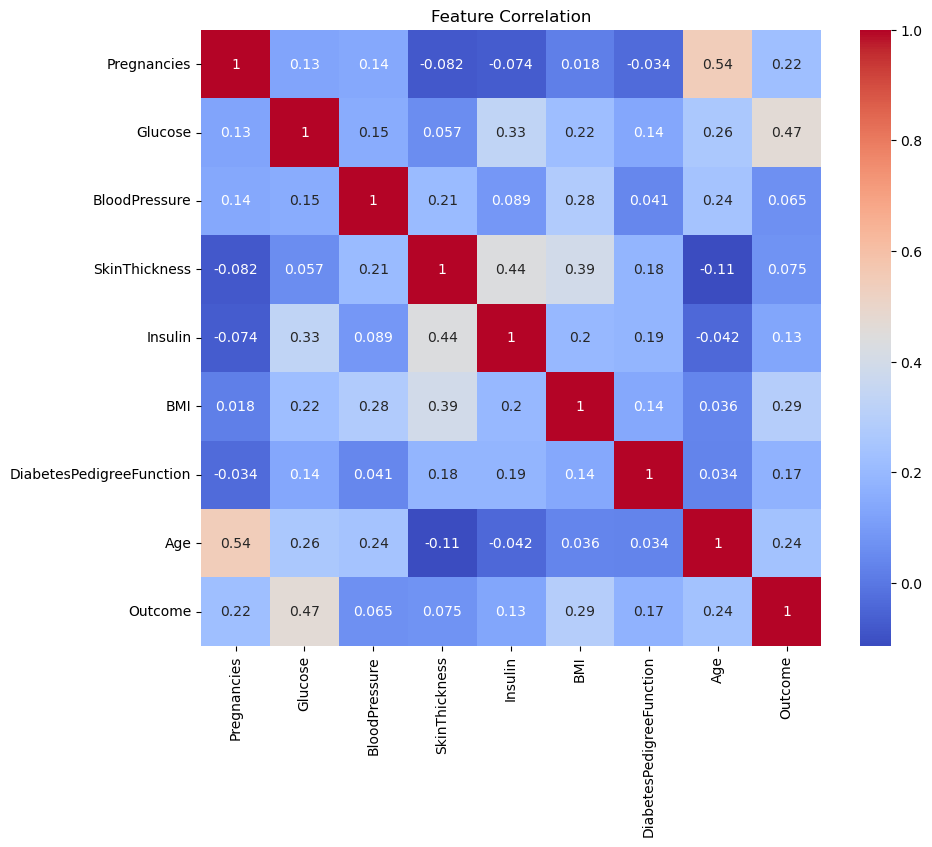

In [5]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

In [6]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [10]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7467532467532467
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.82      0.81        99
           1       0.65      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.75      0.75       154

Confusion Matrix:
 [[81 18]
 [21 34]]


In [12]:
sample_data = pd.DataFrame([[6,148,72,35,0,33.6,0.627,50]], columns=X.columns)
sample_scaled = scaler.transform(sample_data)
prediction = model.predict(sample_scaled)
print("Diabetes Prediction:", "Positive" if prediction[0] == 1 else "Negative")

Diabetes Prediction: Positive


In [12]:
# Get predictions from the model
y_pred = model.predict(X_test)

# Get indices where the model predicts the positive class (1)
positive_predictions = y_pred[y_pred == 1]

# Print the number of positive predictions
print(f"Number of positive predictions: {len(positive_predictions)}")

# If you want to see the actual data corresponding to positive predictions
positive_data = X_test[y_pred == 1]

# Display the positive predictions and corresponding data (optional)
print("Positive Predictions Data:")
print(positive_data)


Number of positive predictions: 68
Positive Predictions Data:
[[ 5.70070180e-01 -7.77693803e-01 -1.19009016e+00  6.14264578e-01
   9.03950385e-01  2.25456789e-01 -1.26471402e-01  8.30381132e-01]
 [ 9.01245595e-01  4.71547498e-01  1.45699607e+00 -4.69980874e-01
  -6.08200957e-01 -3.71263676e-01 -7.90897511e-01  1.42599540e+00]
 [ 5.70070180e-01 -6.13319948e-01 -3.19899336e-02  5.05840033e-01
   9.03950385e-01  7.63960624e-01 -4.46603982e-01  1.85143417e+00]
 [-4.23456064e-01 -1.53073153e-01 -3.19899336e-02 -4.69980874e-01
  -6.08200957e-01  1.96348474e-01  1.38962817e+00  9.15468886e-01]
 [-9.22806495e-02  1.06329338e+00 -3.19899336e-02  1.80566398e-01
   2.97193733e-01 -1.67505469e-01 -4.04322320e-01  3.19854614e-01]
 [ 2.38894765e-01  8.33169979e-01  4.64338734e-01 -4.69980874e-01
  -6.08200957e-01  1.81794316e-01 -7.66736562e-01  2.70231170e+00]
 [ 9.01245595e-01  1.88516265e+00  1.87060329e+00  3.97415488e-01
  -6.08200957e-01  2.54565105e-01 -9.29822970e-01  2.27687294e+00]
 [ 2.38

In [11]:
# Get predictions from the model
y_pred = model.predict(X_test)

# Get indices where the model predicts the negative class (0)
negative_predictions = y_pred[y_pred == 0]

# Print the number of negative predictions
print(f"Number of negative predictions: {len(negative_predictions)}")

# If you want to see the actual data corresponding to negative predictions
negative_data = X_test[y_pred == 0]

# Display the negative predictions and corresponding data (optional)
print("Negative Predictions Data:")
print(negative_data)


Number of negative predictions: 86
Negative Predictions Data:
[[-7.54631479e-01 -3.17447008e-01  2.16174400e-01  5.05840033e-01
  -6.08200957e-01  4.72877470e-01 -9.78144869e-01 -1.04154944e+00]
 [-7.54631479e-01 -4.48946092e-01 -6.93761490e-01 -4.69980874e-01
  -6.08200957e-01 -2.40276257e-01 -9.47943682e-01 -1.04154944e+00]
 [ 1.23242101e+00 -4.81820863e-01  6.29781623e-01 -4.69980874e-01
  -6.08200957e-01 -1.14263403e+00  1.16009915e+00  6.45913543e-02]
 [-1.08580689e+00 -1.66531262e+00 -2.01730460e+00 -1.01210360e+00
  -1.76834901e-01 -1.75390866e+00 -4.49624101e-01 -9.56461683e-01]
 [ 1.89477184e+00 -3.50321779e-01 -1.97432823e-01 -3.62826929e-02
  -6.08200957e-01 -7.20563461e-01 -9.99285700e-01  5.75117873e-01]
 [-9.22806495e-02  8.66044750e-01 -1.02464727e+00 -3.62826929e-02
   2.11746369e+00 -2.25722099e-01 -9.72104632e-01 -3.60847411e-01]
 [-7.54631479e-01 -1.10644151e+00 -1.19009016e+00 -1.44707238e-01
  -7.45669261e-01 -5.89576042e-01  8.88288474e-01 -9.56461683e-01]
 [-4.23

In [13]:
from sklearn.ensemble import GradientBoostingClassifier

# Step 1: Train the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Step 2: Predict
y_pred_gb = gb_model.predict(X_test)

# Step 3: Evaluate
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.7467532467532467
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

Confusion Matrix:
 [[78 21]
 [18 37]]


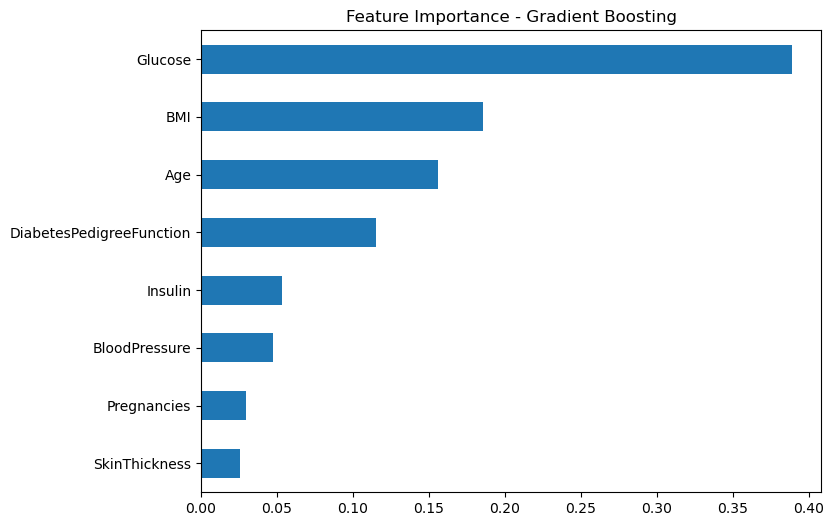

In [14]:
import matplotlib.pyplot as plt

feature_importance = pd.Series(gb_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=True).plot(kind='barh', figsize=(8,6))
plt.title("Feature Importance - Gradient Boosting")
plt.show()


In [15]:
!pip install imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable


In [16]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train again with Gradient Boosting or Random Forest
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train_smote, y_train_smote)
y_pred = model.predict(X_test)

# Evaluate
print("SMOTE Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


C:\Users\Neeli Sai Kishore\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


SMOTE Accuracy: 0.7012987012987013
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.71      0.75        99
           1       0.57      0.69      0.62        55

    accuracy                           0.70       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.70      0.71       154

Confusion Matrix:
 [[70 29]
 [17 38]]


In [2]:
pip install XGBoost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
